In [0]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [0]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    
    fig.canvas.draw()

In [0]:
batch_size = 128
num_classes = 10
epochs = 12

In [0]:

# input image dimensions
img_rows, img_cols = 28, 28


In [0]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
# convert class vectors to binary class matrices

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

1. Model 1 - 2 Hidden Layers + Adam + Max Pooling + Kernel 3X3


In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

history1 = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 161s 3ms/step - loss: 0.2563 - accuracy: 0.9215 - val_loss: 0.0533 - val_accuracy: 0.9826
Epoch 2/12
60000/60000 [==============================] - 159s 3ms/step - loss: 0.0868 - accuracy: 0.9742 - val_loss: 0.0380 - val_accuracy: 0.9887
Epoch 3/12
60000/60000 [==============================] - 160s 3ms/step - loss: 0.0642 - accuracy: 0.9812 - val_loss: 0.0337 - val_accuracy: 0.9890
Epoch 4/12
60000/60000 [==============================] - 166s 3ms/step - loss: 0.0507 - accuracy: 0.9852 - val_loss: 0.0306 - val_accuracy: 0.9896
Epoch 5/12
60000/60000 [==============================] - 159s 3ms/step - loss: 0.0459 - accuracy: 0.9865 - val_loss: 0.0300 - val_accuracy: 0.9898
Epoch 6/12
60000/60000 [==============================] - 164s 3ms/step - loss: 0.0412 - accuracy: 0.9873 - val_loss: 0.0299 - val_accuracy: 0.9906
Epoch 7/12
60000/60000 [==============================] - 159s

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02725159512477494
Test accuracy: 0.9916999936103821


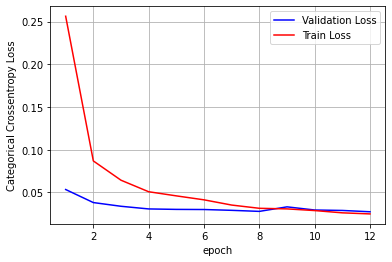

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history1.history['val_loss']
ty = history1.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
%matplotlib inline

plt.close('all')

2. Model 2 - 2 Hidden Layers + Adam + Max Pooling + Kernel 5X5


In [0]:
model_2 = Sequential()
model_2.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model_2.add(Conv2D(64, (3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))
model_2.add(Flatten())
model_2.add(Dense(128, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes, activation='softmax'))

model_2.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

history2 = model_2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 143s 2ms/step - loss: 0.2291 - accuracy: 0.9298 - val_loss: 0.0442 - val_accuracy: 0.9858
Epoch 2/12
60000/60000 [==============================] - 140s 2ms/step - loss: 0.0777 - accuracy: 0.9772 - val_loss: 0.0345 - val_accuracy: 0.9887
Epoch 3/12
60000/60000 [==============================] - 139s 2ms/step - loss: 0.0594 - accuracy: 0.9825 - val_loss: 0.0281 - val_accuracy: 0.9899
Epoch 4/12
60000/60000 [==============================] - 136s 2ms/step - loss: 0.0485 - accuracy: 0.9850 - val_loss: 0.0287 - val_accuracy: 0.9907
Epoch 5/12
60000/60000 [==============================] - 139s 2ms/step - loss: 0.0421 - accuracy: 0.9871 - val_loss: 0.0293 - val_accuracy: 0.9902
Epoch 6/12
60000/60000 [==============================] - 138s 2ms/step - loss: 0.0354 - accuracy: 0.9886 - val_loss: 0.0248 - val_accuracy: 0.9922
Epoch 7/12
60000/60000 [==============================] - 134s

In [0]:
score = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.022658589654864773
Test accuracy: 0.9941999912261963


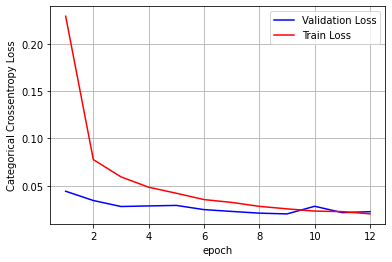

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history2.history['val_loss']
ty = history2.history['loss']
plt_dynamic(x, vy, ty, ax)

3. Model 3 - 2 Hidden Layers + Adam + Max Pooling + Kernel 7X7

In [0]:
model_3 = Sequential()
model_3.add(Conv2D(32, kernel_size=(7, 7), activation='relu', input_shape=input_shape))
model_3.add(Conv2D(64, (3, 3), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))
model_3.add(Flatten())
model_3.add(Dense(128, activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(num_classes, activation='softmax'))

model_3.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

history3 = model_3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 121s 2ms/step - loss: 0.2429 - accuracy: 0.9261 - val_loss: 0.0576 - val_accuracy: 0.9812
Epoch 2/12
60000/60000 [==============================] - 120s 2ms/step - loss: 0.0848 - accuracy: 0.9749 - val_loss: 0.0396 - val_accuracy: 0.9864
Epoch 3/12
60000/60000 [==============================] - 120s 2ms/step - loss: 0.0623 - accuracy: 0.9815 - val_loss: 0.0284 - val_accuracy: 0.9899
Epoch 4/12
60000/60000 [==============================] - 118s 2ms/step - loss: 0.0525 - accuracy: 0.9846 - val_loss: 0.0275 - val_accuracy: 0.9903
Epoch 5/12
60000/60000 [==============================] - 120s 2ms/step - loss: 0.0439 - accuracy: 0.9867 - val_loss: 0.0251 - val_accuracy: 0.9912
Epoch 6/12
60000/60000 [==============================] - 120s 2ms/step - loss: 0.0391 - accuracy: 0.9881 - val_loss: 0.0250 - val_accuracy: 0.9912
Epoch 7/12
60000/60000 [==============================] - 121s

In [0]:
score = model_3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.024444635773069046
Test accuracy: 0.9926999807357788


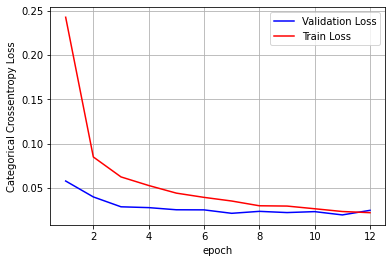

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history3.history['val_loss']
ty = history3.history['loss']
plt_dynamic(x, vy, ty, ax)

4. Model 4 - 3 Hidden Layers + Adadelta + Max Pooling + Kernel 3X3


In [0]:
model_4 = Sequential()
model_4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model_4.add(Conv2D(64, (3, 3), activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Conv2D(128, (3, 3), activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.25))
model_4.add(Flatten())
model_4.add(Dense(256, activation='relu'))
model_4.add(Dropout(0.5))
model_4.add(Dense(num_classes, activation='softmax'))

model_4.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

history4 = model_4.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 223s 4ms/step - loss: 0.2301 - accuracy: 0.9277 - val_loss: 0.0438 - val_accuracy: 0.9858
Epoch 2/12
60000/60000 [==============================] - 224s 4ms/step - loss: 0.0668 - accuracy: 0.9802 - val_loss: 0.0340 - val_accuracy: 0.9882
Epoch 3/12
60000/60000 [==============================] - 223s 4ms/step - loss: 0.0485 - accuracy: 0.9850 - val_loss: 0.0310 - val_accuracy: 0.9889
Epoch 4/12
60000/60000 [==============================] - 223s 4ms/step - loss: 0.0392 - accuracy: 0.9883 - val_loss: 0.0245 - val_accuracy: 0.9914
Epoch 5/12
60000/60000 [==============================] - 225s 4ms/step - loss: 0.0333 - accuracy: 0.9900 - val_loss: 0.0241 - val_accuracy: 0.9916
Epoch 6/12
60000/60000 [==============================] - 222s 4ms/step - loss: 0.0287 - accuracy: 0.9911 - val_loss: 0.0231 - val_accuracy: 0.9920
Epoch 7/12
60000/60000 [==============================] - 221s

In [0]:
score = model_4.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02026035915006364
Test accuracy: 0.9943000078201294


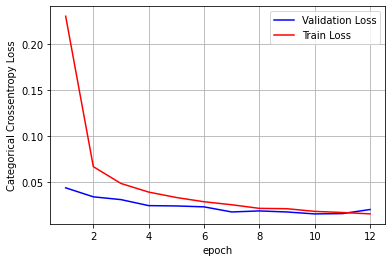

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history4.history['val_loss']
ty = history4.history['loss']
plt_dynamic(x, vy, ty, ax)

5. Model 5 - 3 Hidden Layers + Adam + Max Pooling + Kernel 5X5


In [0]:
model_5 = Sequential()
model_5.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model_5.add(Conv2D(64, (5, 5), activation='relu'))
model_5.add(MaxPooling2D(pool_size=(2, 2)))
model_5.add(Conv2D(128, (5, 5), activation='relu'))
model_5.add(MaxPooling2D(pool_size=(2, 2)))
model_5.add(Dropout(0.25))
model_5.add(Flatten())
model_5.add(Dense(256, activation='relu'))
model_5.add(Dropout(0.5))
model_5.add(Dense(num_classes, activation='softmax'))

model_5.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

history5 = model_5.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 295s 5ms/step - loss: 0.2307 - accuracy: 0.9267 - val_loss: 0.0665 - val_accuracy: 0.9772
Epoch 2/12
60000/60000 [==============================] - 293s 5ms/step - loss: 0.0605 - accuracy: 0.9822 - val_loss: 0.0273 - val_accuracy: 0.9905
Epoch 3/12
60000/60000 [==============================] - 293s 5ms/step - loss: 0.0428 - accuracy: 0.9869 - val_loss: 0.0213 - val_accuracy: 0.9928
Epoch 4/12
60000/60000 [==============================] - 296s 5ms/step - loss: 0.0346 - accuracy: 0.9896 - val_loss: 0.0204 - val_accuracy: 0.9927
Epoch 5/12
60000/60000 [==============================] - 296s 5ms/step - loss: 0.0275 - accuracy: 0.9919 - val_loss: 0.0260 - val_accuracy: 0.9923
Epoch 6/12
60000/60000 [==============================] - 297s 5ms/step - loss: 0.0240 - accuracy: 0.9926 - val_loss: 0.0182 - val_accuracy: 0.9942
Epoch 7/12
60000/60000 [==============================] - 298s

In [0]:
score = model_5.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02111709487823191
Test accuracy: 0.9948999881744385


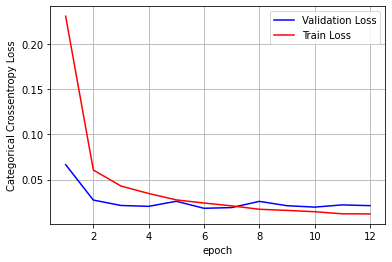

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history5.history['val_loss']
ty = history5.history['loss']
plt_dynamic(x, vy, ty, ax)

6. Model 6 - 3 Hidden Layers + Adam + Max Pooling + Kernel 7X7

In [0]:
model_6 = Sequential()
model_6.add(Conv2D(32, kernel_size=(7, 7), activation='relu', input_shape=input_shape))
model_6.add(Conv2D(64, (7, 7), activation='relu'))
model_6.add(MaxPooling2D(pool_size=(2, 2)))
model_6.add(Conv2D(128, (7, 7), activation='relu'))
model_6.add(MaxPooling2D(pool_size=(2, 2)))
model_6.add(Dropout(0.25))
model_6.add(Flatten())
model_6.add(Dense(256, activation='relu'))
model_6.add(Dropout(0.5))
model_6.add(Dense(num_classes, activation='softmax'))

model_6.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

history6 = model_6.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 326s 5ms/step - loss: 0.2604 - accuracy: 0.9186 - val_loss: 0.0423 - val_accuracy: 0.9871
Epoch 2/12
60000/60000 [==============================] - 333s 6ms/step - loss: 0.0646 - accuracy: 0.9816 - val_loss: 0.0263 - val_accuracy: 0.9911
Epoch 3/12
60000/60000 [==============================] - 336s 6ms/step - loss: 0.0447 - accuracy: 0.9873 - val_loss: 0.0250 - val_accuracy: 0.9910
Epoch 4/12
60000/60000 [==============================] - 343s 6ms/step - loss: 0.0337 - accuracy: 0.9903 - val_loss: 0.0208 - val_accuracy: 0.9933
Epoch 5/12
60000/60000 [==============================] - 330s 5ms/step - loss: 0.0283 - accuracy: 0.9918 - val_loss: 0.0192 - val_accuracy: 0.9943
Epoch 6/12
60000/60000 [==============================] - 330s 5ms/step - loss: 0.0233 - accuracy: 0.9932 - val_loss: 0.0202 - val_accuracy: 0.9929
Epoch 7/12
60000/60000 [==============================] - 334s

In [0]:
score = model_6.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.021667842179494943
Test accuracy: 0.9940999746322632


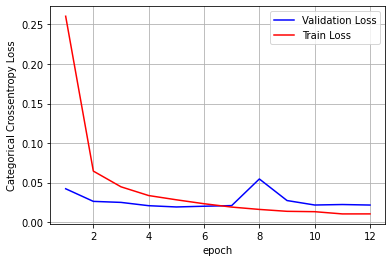

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history6.history['val_loss']
ty = history6.history['loss']
plt_dynamic(x, vy, ty, ax)

7. Model 7 - 5 Hidden Layers + Adadelta + Max Pooling + Kernel 3X3


In [0]:
model_7 = Sequential()
model_7.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model_7.add(Conv2D(32, (3, 3), activation='relu'))
model_7.add(MaxPooling2D(pool_size=(2, 2)))
model_7.add(Conv2D(64, (3, 3), activation='relu'))
model_7.add(MaxPooling2D(pool_size=(2, 2)))
model_7.add(Conv2D(32, (3,3 ), activation='relu'))
model_7.add(Dropout(0.2))
model_7.add(Conv2D(16, (3, 3), activation='relu'))
model_7.add(Dropout(0.2))
model_7.add(Flatten())
model_7.add(Dense(256, activation='relu'))
model_7.add(Dropout(0.5))
model_7.add(Dense(num_classes, activation='softmax'))

model_7.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

history7 = model_7.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 79s 1ms/step - loss: 0.6201 - accuracy: 0.7868 - val_loss: 0.0743 - val_accuracy: 0.9782
Epoch 2/12
60000/60000 [==============================] - 77s 1ms/step - loss: 0.1843 - accuracy: 0.9416 - val_loss: 0.0442 - val_accuracy: 0.9871
Epoch 3/12
60000/60000 [==============================] - 75s 1ms/step - loss: 0.1345 - accuracy: 0.9567 - val_loss: 0.0363 - val_accuracy: 0.9887
Epoch 4/12
60000/60000 [==============================] - 75s 1ms/step - loss: 0.1102 - accuracy: 0.9655 - val_loss: 0.0356 - val_accuracy: 0.9894
Epoch 5/12
60000/60000 [==============================] - 75s 1ms/step - loss: 0.0995 - accuracy: 0.9681 - val_loss: 0.0302 - val_accuracy: 0.9912
Epoch 6/12
60000/60000 [==============================] - 74s 1ms/step - loss: 0.0881 - accuracy: 0.9709 - val_loss: 0.0317 - val_accuracy: 0.9909
Epoch 7/12
60000/60000 [==============================] - 74s 1ms/st

In [0]:
score = model_7.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.025203440525786026
Test accuracy: 0.9922999739646912


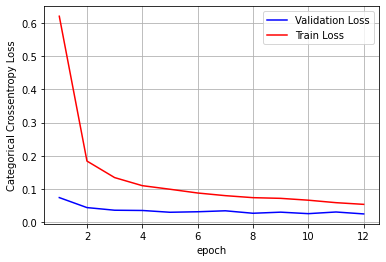

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history7.history['val_loss']
ty = history7.history['loss']
plt_dynamic(x, vy, ty, ax)

8. Model 8 - 5 Hidden Layers + Adam + Max Pooling + Kernel 5X5


In [0]:
model_8 = Sequential()
model_8.add(Conv2D(16, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model_8.add(Conv2D(32, (5, 5), activation='relu'))
model_8.add(Dropout(0.25))
#model_8.add(MaxPooling2D(pool_size=(2, 2)))
model_8.add(Conv2D(64, (5, 5), activation='relu'))
model_8.add(Dropout(0.25))
#model_8.add(MaxPooling2D(pool_size=(2, 2)))
model_8.add(Conv2D(64, (5, 5), activation='relu'))
#model_8.add(MaxPooling2D(pool_size=(2, 2)))
model_8.add(Conv2D(32, (5, 5), activation='relu'))
#model_8.add(MaxPooling2D(pool_size=(2, 2)))
model_8.add(Dropout(0.25))
model_8.add(Flatten())
model_8.add(Dense(256, activation='relu'))
model_8.add(Dropout(0.5))
model_8.add(Dense(num_classes, activation='softmax'))

model_8.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

history8 = model_8.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 424s 7ms/step - loss: 0.2472 - accuracy: 0.9212 - val_loss: 0.0467 - val_accuracy: 0.9853
Epoch 2/12
60000/60000 [==============================] - 427s 7ms/step - loss: 0.0703 - accuracy: 0.9794 - val_loss: 0.0313 - val_accuracy: 0.9888
Epoch 3/12
60000/60000 [==============================] - 431s 7ms/step - loss: 0.0538 - accuracy: 0.9841 - val_loss: 0.0273 - val_accuracy: 0.9905
Epoch 4/12
60000/60000 [==============================] - 436s 7ms/step - loss: 0.0493 - accuracy: 0.9852 - val_loss: 0.0302 - val_accuracy: 0.9908
Epoch 5/12
60000/60000 [==============================] - 444s 7ms/step - loss: 0.0406 - accuracy: 0.9879 - val_loss: 0.0311 - val_accuracy: 0.9912
Epoch 6/12
60000/60000 [==============================] - 455s 8ms/step - loss: 0.0358 - accuracy: 0.9893 - val_loss: 0.0347 - val_accuracy: 0.9902
Epoch 7/12
60000/60000 [==============================] - 444s

In [0]:
score = model_8.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02530543410599985
Test accuracy: 0.9930999875068665


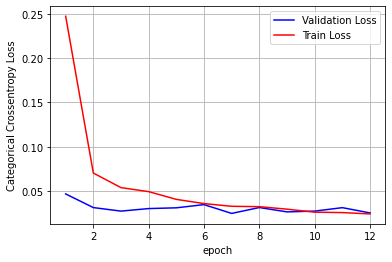

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history8.history['val_loss']
ty = history8.history['loss']
plt_dynamic(x, vy, ty, ax)

9. Model 9 - 5 Hidden Layers + Adam + Max Pooling + Kernel 7X7 + padding

In [0]:
model_9 = Sequential()
model_9.add(Conv2D(16, kernel_size=(7, 7), activation='relu', input_shape=input_shape))
model_9.add(Conv2D(24, (7, 7), activation='relu',padding='same'))
model_9.add(MaxPooling2D(pool_size=(2, 2)))
model_9.add(Dropout(0.25))
model_9.add(Conv2D(32, (7, 7), activation='relu',padding='same'))
model_9.add(MaxPooling2D(pool_size=(2, 2)))
model_9.add(Conv2D(24, (7, 7), activation='relu',padding='same'))
model_9.add(MaxPooling2D(pool_size=(2, 2)))
model_9.add(Conv2D(16, (7, 7), activation='relu',padding='same'))
model_9.add(MaxPooling2D(pool_size=(2, 2)))
model_9.add(Dropout(0.25))
model_9.add(Flatten())
model_9.add(Dense(256, activation='relu'))
model_9.add(Dropout(0.5))
model_9.add(Dense(num_classes, activation='softmax'))

model_9.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

history9 = model_9.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 245s 4ms/step - loss: 0.5550 - accuracy: 0.8082 - val_loss: 0.0797 - val_accuracy: 0.9780
Epoch 2/12
60000/60000 [==============================] - 245s 4ms/step - loss: 0.1518 - accuracy: 0.9567 - val_loss: 0.0495 - val_accuracy: 0.9867
Epoch 3/12
60000/60000 [==============================] - 244s 4ms/step - loss: 0.1096 - accuracy: 0.9679 - val_loss: 0.0438 - val_accuracy: 0.9879
Epoch 4/12
60000/60000 [==============================] - 241s 4ms/step - loss: 0.0925 - accuracy: 0.9734 - val_loss: 0.0488 - val_accuracy: 0.9858
Epoch 5/12
60000/60000 [==============================] - 243s 4ms/step - loss: 0.0782 - accuracy: 0.9779 - val_loss: 0.0356 - val_accuracy: 0.9900
Epoch 6/12
60000/60000 [==============================] - 243s 4ms/step - loss: 0.0684 - accuracy: 0.9809 - val_loss: 0.0344 - val_accuracy: 0.9908
Epoch 7/12
60000/60000 [==============================] - 243s

In [0]:
score = model_9.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.034396228901209545
Test accuracy: 0.9908999800682068


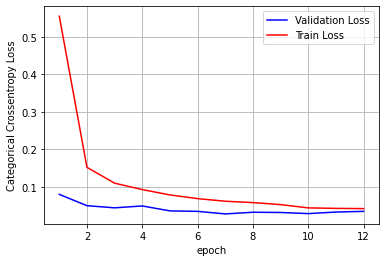

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history9.history['val_loss']
ty = history9.history['loss']
plt_dynamic(x, vy, ty, ax)

In [1]:

from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Hidden Layers","Parameters","Accuracy"]
x.add_row([2,'CNN + ReLU +  Adadelta + Max Pooling + Kernel 3X3 + Dropout ', 0.9916])
x.add_row([2,'CNN + ReLU +  Adam + Max Pooling + Kernel 5X5 + Dropout ', 0.9941])
x.add_row([2,'CNN + ReLU +  Adam + Max Pooling + Kernel 7X7 + Dropout', 0.9926])
x.add_row([3,'CNN + ReLU +  Adadelta + Max Pooling + Kernel 3X3 + Dropout ', 0.9943])
x.add_row([3,'CNN + ReLU +  Adam + Max Pooling + Kernel 5X5 + Dropout', 0.9948])
x.add_row([3,'CNN + ReLU +  Adam + Max Pooling + Kernel 7X7 + Dropout', 0.9940])
x.add_row([5,'CNN + ReLU +  Adadelta + Max Pooling + Kernel 3X3 + Dropout', 0.9922])
x.add_row([5,'CNN + ReLU +  Adam + Max Pooling + Kernel 5X5 + Dropout', 0.9930])
x.add_row([5,'CNN + ReLU +  Adam + Max Pooling + Kernel 7X7 + Dropout + padding', 0.9908])
print(x)


+---------------+-------------------------------------------------------------------+----------+
| Hidden Layers |                             Parameters                            | Accuracy |
+---------------+-------------------------------------------------------------------+----------+
|       2       |    CNN + ReLU +  Adadelta + Max Pooling + Kernel 3X3 + Dropout    |  0.9916  |
|       2       |      CNN + ReLU +  Adam + Max Pooling + Kernel 5X5 + Dropout      |  0.9941  |
|       2       |      CNN + ReLU +  Adam + Max Pooling + Kernel 7X7 + Dropout      |  0.9926  |
|       3       |    CNN + ReLU +  Adadelta + Max Pooling + Kernel 3X3 + Dropout    |  0.9943  |
|       3       |      CNN + ReLU +  Adam + Max Pooling + Kernel 5X5 + Dropout      |  0.9948  |
|       3       |      CNN + ReLU +  Adam + Max Pooling + Kernel 7X7 + Dropout      |  0.994   |
|       5       |    CNN + ReLU +  Adadelta + Max Pooling + Kernel 3X3 + Dropout    |  0.9922  |
|       5       |      CNN + R